In [ ]:
!pip install -q wandb
import wandb
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: suhani-panda2023 (sanjanabadam06-vit-chennai) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot
License(s): CC-BY-NC-SA-4.0
edgeiiotset-cyber-security-dataset-of-iot-iiot.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  edgeiiotset-cyber-security-dataset-of-iot-iiot.zip
  inflating: edgeiiotset/Edge-IIoTset dataset/Attack traffic/Backdoor_attack.csv  
  inflating: edgeiiotset/Edge-IIoTset dataset/Attack traffic/Backdoor_attack.pcap  
  inflating: edgeiiotset/Edge-IIoTset dataset/Attack traffic/DDoS HTTP Flood Attacks.pcap  
  inflating: edgeiiotset/Edge-IIoTset dataset/Attack traffic/DDoS ICMP Flood Attacks.pcap  
  inflating: edgeiiotset/Edge-IIoTset dataset/Attack traffic/DDoS TCP SYN Flood Attacks.pcap  
  inflating: edgeiiotset/Edge-IIoTset dataset/Attack traffic/DDoS UDP Flood Attacks.pcap  
  inflating: edgeiiotset/Edge-IIoTset dataset/Attack traffic/DDoS_HTTP_Flood_attack.csv  
  inf

Epoch 01: Loss=0.9921, Acc=0.5000
Epoch 02: Loss=0.9282, Acc=0.5007
Epoch 03: Loss=0.8900, Acc=0.5082
Epoch 04: Loss=0.8659, Acc=0.5164
Epoch 05: Loss=0.8487, Acc=0.5321
Epoch 06: Loss=0.8345, Acc=0.5458
Epoch 07: Loss=0.8221, Acc=0.5526
Epoch 08: Loss=0.8094, Acc=0.5594
Epoch 09: Loss=0.7957, Acc=0.5642
Epoch 10: Loss=0.7812, Acc=0.5717
Epoch 11: Loss=0.7668, Acc=0.5820
Epoch 12: Loss=0.7511, Acc=0.5990
Epoch 13: Loss=0.7344, Acc=0.6428
Epoch 14: Loss=0.7161, Acc=0.7036
Epoch 15: Loss=0.6974, Acc=0.7637
Epoch 16: Loss=0.6785, Acc=0.8204
Epoch 17: Loss=0.6560, Acc=0.8682
Epoch 18: Loss=0.6335, Acc=0.9044
Epoch 19: Loss=0.6124, Acc=0.9296
Epoch 20: Loss=0.5877, Acc=0.9440
Epoch 21: Loss=0.5621, Acc=0.9508
Epoch 22: Loss=0.5512, Acc=0.9542
Epoch 23: Loss=0.5365, Acc=0.9570
Epoch 24: Loss=0.5220, Acc=0.9590
Epoch 25: Loss=0.5110, Acc=0.9617
Epoch 26: Loss=0.4955, Acc=0.9652
Epoch 27: Loss=0.4814, Acc=0.9658
Epoch 28: Loss=0.4672, Acc=0.9672
Epoch 29: Loss=0.4543, Acc=0.9652
Epoch 30: Loss

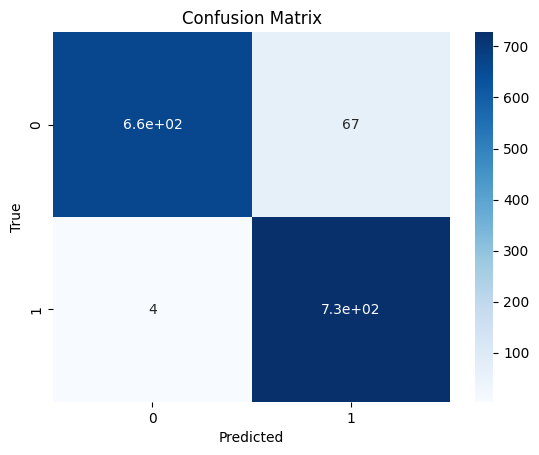

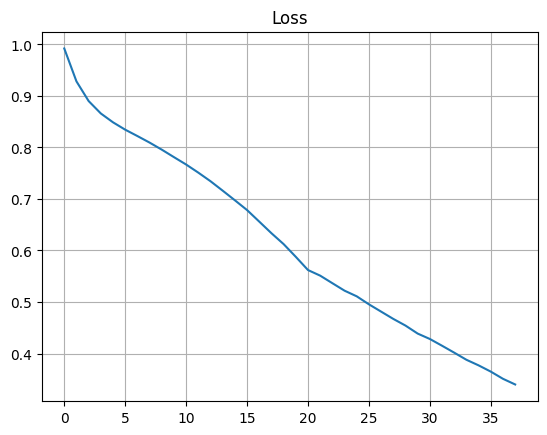

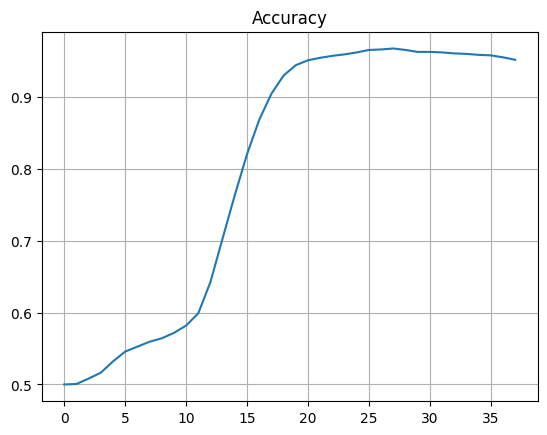

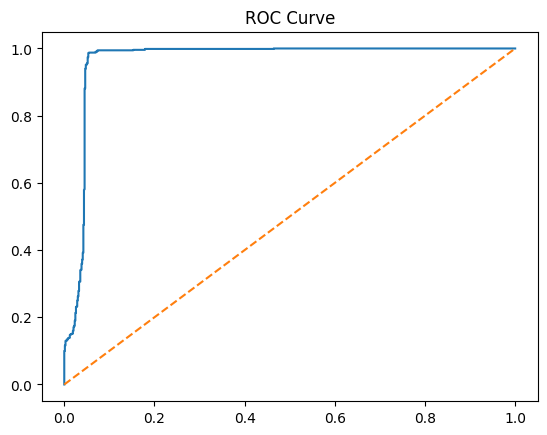

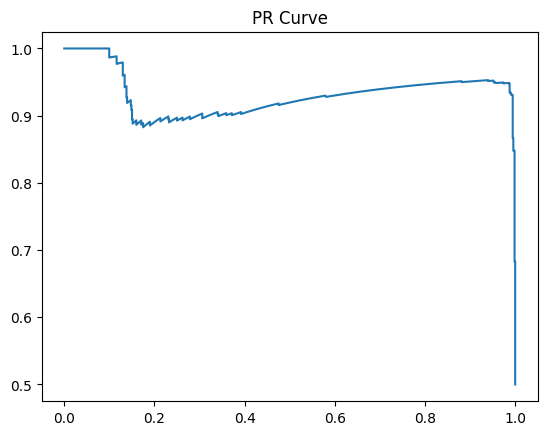

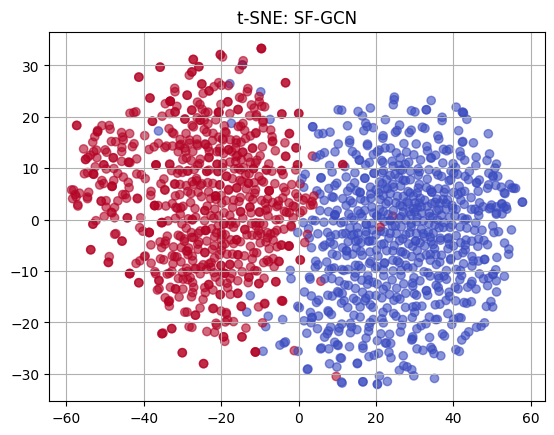

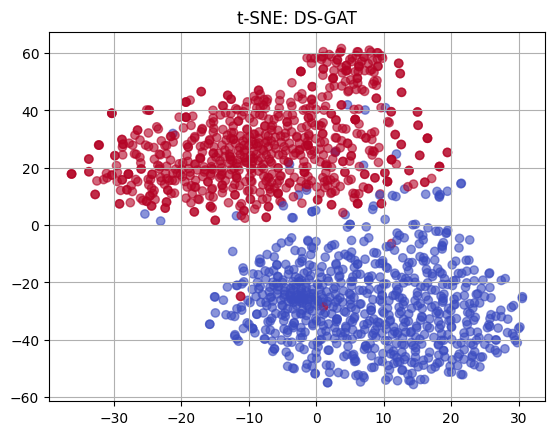

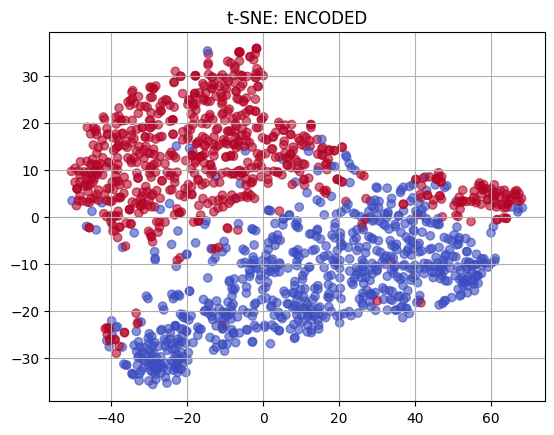

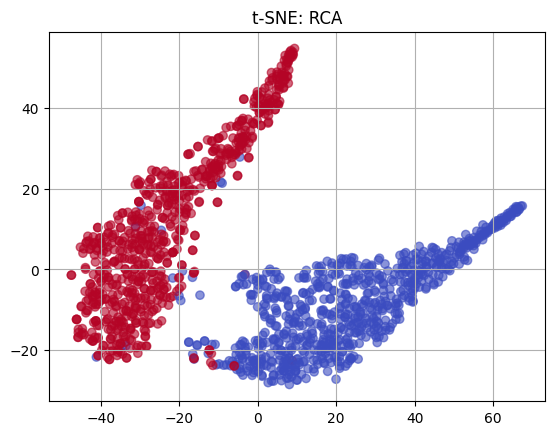

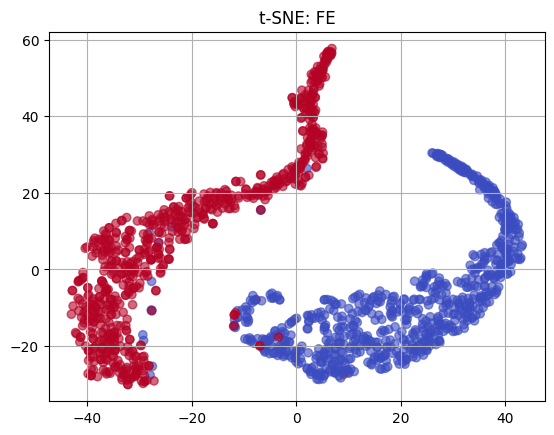

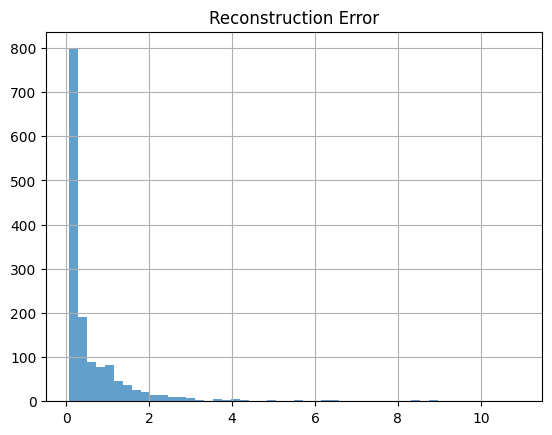

['/content/wandb/run-20250611_024333-x7rax6ko/files/7stage_model.pt']

In [ ]:
# ✅ Final Integrated Code: 7-Stage GCN + W&B + Edge-IIoTset
# Paste this directly into Google Colab

# === INSTALL DEPENDENCIES ===
!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-2.0.0+cpu.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-2.0.0+cpu.html
!pip install -q torch-geometric imbalanced-learn matplotlib seaborn wandb

# === UPLOAD FILE ===
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mohamedamineferrag/edgeiiotset-cyber-security-dataset-of-iot-iiot
!unzip -o edgeiiotset-cyber-security-dataset-of-iot-iiot.zip -d edgeiiotset
!ls -R edgeiiotset
import pandas as pd

df = pd.read_csv("edgeiiotset/Edge-IIoTset dataset/Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv", low_memory=False)
df.head()
!ls -R edgeiiotset
from sklearn.utils import shuffle

# Drop unnecessary columns
drop_columns = [
    "frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4",
    "arp.dst.proto_ipv4", "http.file_data", "http.request.full_uri",
    "icmp.transmit_timestamp", "http.request.uri.query", "tcp.options",
    "tcp.payload", "tcp.srcport", "tcp.dstport", "udp.port", "mqtt.msg"
]
df.drop(columns=drop_columns, inplace=True, errors='ignore')

# Drop rows with missing values
df.dropna(inplace=True)

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Shuffle the dataset
df = shuffle(df)

# Display the number of missing values per column
print(df.isna().sum())

# Display the distribution of attack types
print(df['Attack_type'].value_counts())
# List of categorical columns to encode
categorical_columns = [
    'http.request.method', 'http.referer', 'http.request.version',
    'dns.qry.name.len', 'mqtt.conack.flags', 'mqtt.protoname', 'mqtt.topic'
]

# Perform one-hot encoding on each categorical column
for col in categorical_columns:
    if col in df.columns:
        dummies = pd.get_dummies(df[col], prefix=col)
        df = pd.concat([df, dummies], axis=1)
        df.drop(columns=[col], inplace=True)
df.to_csv('preprocessed_DNN.csv', index=False)
import os
for dirpath, _, files in os.walk('.'):
    for file in files:
        if file.endswith('.csv'):
            print(os.path.join(dirpath, file))
import pandas as pd

# Load the dataset (adjust path if needed)
df = pd.read_csv("edgeiiotset/Edge-IIoTset dataset/Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv", low_memory=False)

# 1. Check total number of null values in the entire dataset
total_nulls = df.isnull().sum().sum()
print(f"🔍 Total null values in dataset: {total_nulls}")

# 2. Show null values column-wise
print("\n📊 Null values per column:")
print(df.isnull().sum())

# 3. Show only columns that have nulls
print("\n⚠️ Columns with missing data:")
print(df.columns[df.isnull().any()])
# === IMPORTS ===
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, GATConv
from torch_geometric.data import Data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# === W&B INIT ===
wandb.init(
    project="iiot-7stage-gcn",
    name="edgeiiotset-v1",
    config={
        "epochs": 100,
        "lr": 0.001,
        "weight_decay": 1e-4,
        "dropout": 0.3,
        "hidden_size": 64,
        "model": "7StageGCN",
        "dataset": "Edge-IIoTset"
    }
)
config = wandb.config

# === LOAD DATA ===
df = pd.read_csv("edgeiiotset/Edge-IIoTset dataset/Selected dataset for ML and DL/DNN-EdgeIIoT-dataset.csv", low_memory=False)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df = df.sample(n=5000, random_state=42).reset_index(drop=True)
df['binary_label'] = (df['Attack_type'] != 'Normal').astype(int)
y = df['binary_label'].values
X = pd.get_dummies(df.drop(columns=['Attack_type', 'binary_label']))
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === BALANCING ===
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# === KNN GRAPH ===
k = 5
nbrs = NearestNeighbors(n_neighbors=k+1, metric='cosine').fit(X_resampled)
_, indices = nbrs.kneighbors(X_resampled)
edge_index = []
for i in range(len(indices)):
    for j in indices[i][1:]:
        edge_index.append([i, j])
edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()

x = torch.tensor(X_resampled, dtype=torch.float32)
y_tensor = torch.tensor(y_resampled, dtype=torch.float32)
data = Data(x=x, edge_index=edge_index, y=y_tensor)

# === MODEL ===
class SevenStageGCN(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.sf_gcn = GCNConv(input_dim, 64)
        self.ds_gat = GATConv(64, 64)
        self.encoder = nn.Sequential(
            nn.Linear(64, 32), nn.ReLU(), nn.Dropout(config.dropout),
            nn.Linear(32, 16), nn.ReLU(), nn.Dropout(config.dropout))
        self.decoder = nn.Sequential(
            nn.Linear(16, 32), nn.ReLU(), nn.Linear(32, 64), nn.Sigmoid())
        self.rca1 = GCNConv(64, 32)
        self.rca2 = GCNConv(32, 64)
        self.fe = GCNConv(64, 32)
        self.classifier = nn.Sequential(
            nn.Linear(32, 16), nn.ReLU(), nn.Dropout(config.dropout), nn.Linear(16, 1))

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x1 = F.relu(self.sf_gcn(x, edge_index))
        x2 = F.relu(self.ds_gat(x1, edge_index))
        encoded = self.encoder(x2)
        decoded = self.decoder(encoded)
        recon_error = F.mse_loss(decoded, x2, reduction='none').mean(dim=1)
        x3 = F.relu(self.rca1(x2, edge_index))
        x4 = F.relu(self.rca2(x3, edge_index))
        x5 = F.relu(self.fe(x4, edge_index))
        logits = self.classifier(x5).squeeze(1)
        return logits, recon_error, {'SF-GCN': x1, 'DS-GAT': x2, 'ENCODED': encoded, 'RCA': x4, 'FE': x5}

# === TRAINING ===
train_idx, test_idx = train_test_split(range(len(y_resampled)), test_size=0.2, stratify=y_resampled, random_state=42)
train_mask = torch.zeros(len(y_resampled), dtype=torch.bool); train_mask[train_idx] = True
test_mask = torch.zeros(len(y_resampled), dtype=torch.bool); test_mask[test_idx] = True
data.train_mask = train_mask
data.test_mask = test_mask

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SevenStageGCN(input_dim=x.shape[1]).to(device)
data = data.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=config.lr, weight_decay=config.weight_decay)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)

loss_values, acc_values = [], []
pos_weight = (data.y == 0).sum() / (data.y == 1).sum()
best_acc, counter, patience = 0, 0, 10

for epoch in range(config.epochs):
    model.train()
    optimizer.zero_grad()
    logits, recon_error, _ = model(data)
    loss_cls = F.binary_cross_entropy_with_logits(logits[data.train_mask], data.y[data.train_mask], pos_weight=pos_weight)
    loss = loss_cls + torch.mean(recon_error[data.train_mask])
    loss.backward()
    optimizer.step()
    scheduler.step()

    model.eval()
    with torch.no_grad():
        logits_eval, recon_eval, _ = model(data)
        hybrid_score = torch.sigmoid(logits_eval) * (1 + recon_eval)
        y_pred_eval = (hybrid_score[data.test_mask] > 0.5).int()
        y_true_eval = data.y[data.test_mask].int()
        acc = (y_pred_eval == y_true_eval).float().mean().item()
        acc_values.append(acc)
        loss_values.append(loss.item())

    # ✅ Log to W&B
    wandb.log({"epoch": epoch+1, "train_loss": loss.item(), "test_acc": acc})

    print(f"Epoch {epoch+1:02d}: Loss={loss.item():.4f}, Acc={acc:.4f}")

    if acc > best_acc:
        best_acc = acc
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping.")
            break

# === FINAL EVALUATION ===
model.eval()
with torch.no_grad():
    logits, recon_error, stages = model(data)
    hybrid_score = torch.sigmoid(logits) * (1 + recon_error)
    y_pred = (hybrid_score > 0.5).int()
    y_true = data.y[data.test_mask].cpu().int()
    y_pred_np = y_pred[data.test_mask].cpu().int()
    print(classification_report(y_true, y_pred_np))

# Log evaluation metrics to W&B
wandb.log({
    "final_precision": precision_score(y_true, y_pred_np),
    "final_recall": recall_score(y_true, y_pred_np),
    "final_f1": f1_score(y_true, y_pred_np)
})

# === VISUALIZATIONS ===
plt.figure(); sns.heatmap(confusion_matrix(y_true, y_pred_np), annot=True, cmap='Blues')
plt.title('Confusion Matrix'); plt.xlabel('Predicted'); plt.ylabel('True')
wandb.log({"confusion_matrix": wandb.Image(plt.gcf())})
plt.show()

plt.plot(loss_values); plt.title('Loss'); plt.grid(True); wandb.log({"loss_curve": wandb.Image(plt.gcf())}); plt.show()
plt.plot(acc_values); plt.title('Accuracy'); plt.grid(True); wandb.log({"accuracy_curve": wandb.Image(plt.gcf())}); plt.show()

fpr, tpr, _ = roc_curve(y_true, hybrid_score[data.test_mask].cpu())
plt.plot(fpr, tpr); plt.plot([0,1],[0,1],'--'); plt.title('ROC Curve'); wandb.log({"roc_curve": wandb.Image(plt.gcf())}); plt.show()

prec, rec, _ = precision_recall_curve(y_true, hybrid_score[data.test_mask].cpu())
plt.plot(rec, prec); plt.title('PR Curve'); wandb.log({"pr_curve": wandb.Image(plt.gcf())}); plt.show()

tsne = TSNE(n_components=2, random_state=42)
for name, tensor in stages.items():
    tsne_result = tsne.fit_transform(tensor[data.test_mask].cpu().numpy())
    plt.figure()
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=y_true.numpy(), cmap='coolwarm', alpha=0.6)
    plt.title(f't-SNE: {name}'); plt.grid(True)
    wandb.log({f"tsne_{name}": wandb.Image(plt.gcf())})
    plt.show()

plt.hist(recon_error[data.test_mask].cpu().numpy(), bins=50, alpha=0.7)
plt.title('Reconstruction Error'); plt.grid(True)
wandb.log({"recon_error_hist": wandb.Image(plt.gcf())})
plt.show()

# Save model
torch.save(model.state_dict(), "7stage_model.pt")
wandb.save("7stage_model.pt")
